In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2015-01-01'
end = '2025-03-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.045290,26.365888,26.010055,26.253728,28951268
1,2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2,2015-01-06,24.911293,25.616757,24.866133,25.558443,57998800
3,2015-01-07,24.868610,25.173524,24.796649,25.161415,41301082
4,2015-01-08,24.947023,24.986726,24.367368,24.714268,67071641
...,...,...,...,...,...,...
2550,2025-02-24,180.983810,184.879366,180.674166,183.590841,18734000
2551,2025-02-25,177.168152,180.554293,176.568844,179.949986,20832500
2552,2025-02-26,174.501190,177.877349,173.392453,176.743646,23637200


In [5]:
ma_100_days = data.Close.rolling(100).mean()

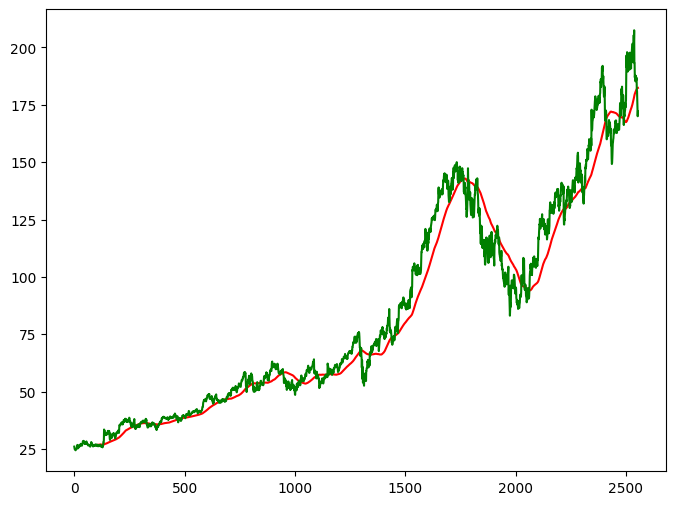

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

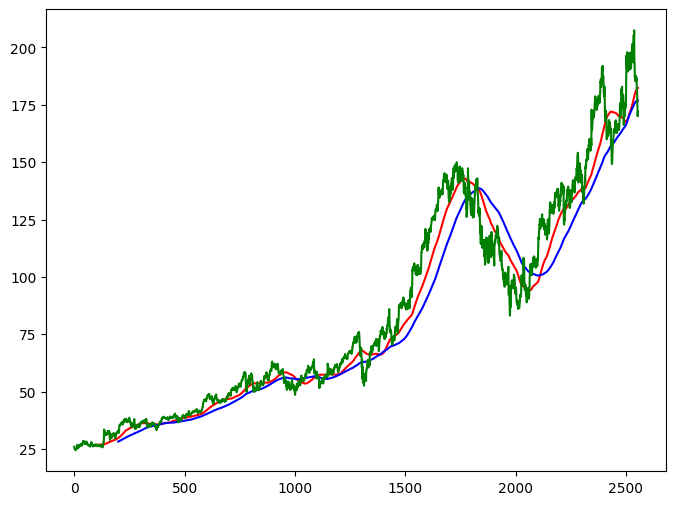

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2044

In [12]:
data_test.shape[0]

511

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0816
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0077
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0062
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0057
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0065
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0062
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0051
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0058
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0041
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0048
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0042
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0047
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0044
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0037
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0038
Epoc

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [30]:
data_test_scale  =  scaler.fit_transform(data_test)

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [32]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [33]:
scale =1/scaler.scale_

In [34]:
y_predict = y_predict*scale

In [35]:
y = y*scale

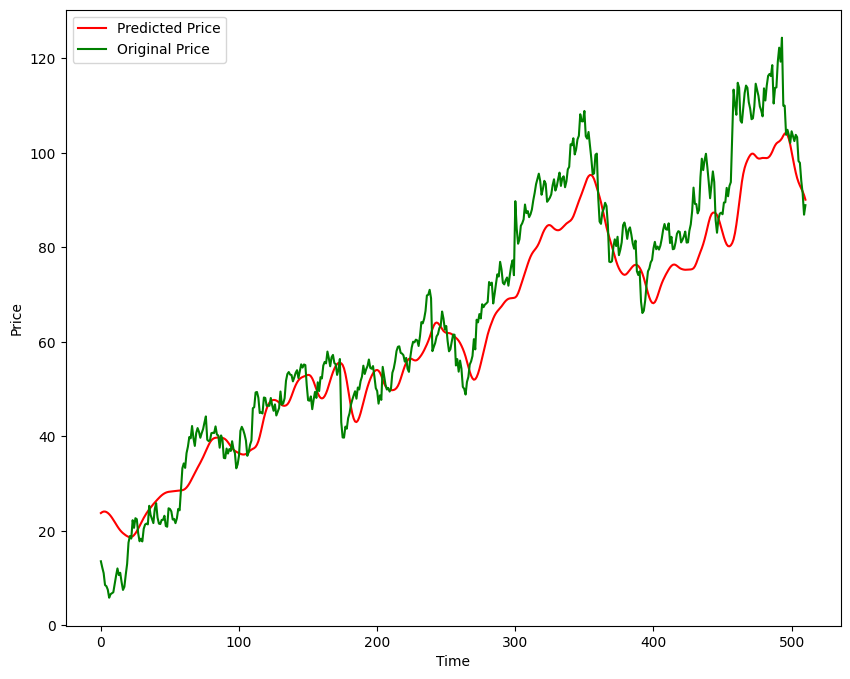

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
model.save('Stock Predictions Model.keras')